In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from fuzzywuzzy import fuzz

In [230]:
df = pd.read_csv("./data/stayzilla_com-travel_sample.csv")
df = df.drop(['sitename','uniq_id'], axis = 1)

## 1.0 Overview

### 1.1 Sample and shape

In [231]:
df.head(5)

additional_info  \
0  Acceptance Rate:100 percent|Response Time:< 6 ...   
1  Acceptance Rate:100 percent|Response Time:< 6 ...   
2  Acceptance Rate:100 percent|Response Time:< 6 ...   
3  Acceptance Rate:100 percent|Response Time:< 6 ...   
4  Acceptance Rate:100 percent|Response Time:< 6 ...   

                                     amenities check_in_date check_out_date  \
0                                    Newspaper    04-08-2016     05-08-2016   
1                                   Parking|AC    04-08-2016     05-08-2016   
2                     Pickup & Drop|Parking|AC    04-08-2016     05-08-2016   
3  WiFi|Newspaper|Pickup & Drop|Gym|Parking|AC    04-08-2016     05-08-2016   
4                                 Newspaper|AC    04-08-2016     05-08-2016   

         city country  crawl_date  \
0   Kalimpong   India  2016-07-20   
1      Kanpur   India  2016-07-20   
2     Jodhpur   India  2016-07-20   
3  Jalpaiguri   India  2016-07-20   
4      Kanpur   India  2016-07-20   

                                         description highlight_value  \
0  Sangsey Valley Resort is Located at the wonder...             NaN   
1  What should you know? Enjoy unmatched service ...             NaN   
2  What should you know? A budget hotel, this acc...             NaN   
3  What should you know? The Riverwood Forest Ret...             NaN   
4  What should you know? Located at a walking dis...             NaN   

   hotel_star_rating  ...  property_type                        qts  \
0                NaN  ...         Resort  2016-07-20 10:59:55 +0000   
1                NaN  ...          Hotel  2016-07-20 10:59:55 +0000   
2                NaN  ...          Hotel  2016-07-20 10:59:55 +0000   
3                NaN  ...          Hotel  2016-07-20 10:59:55 +0000   
4                NaN  ...          Hotel  2016-07-20 10:59:55 +0000   

            query_time_stamp               room_price            room_types  \
0  2016-07-20 10:59:55 +0000  3167per night incl. tax         3 Bedded Room   
1  2016-07-20 10:59:55 +0000   815per night incl. tax  Double Non-A/C Rooms   
2  2016-07-20 10:59:55 +0000  1624per night incl. tax      Deluxe AC Double   
3  2016-07-20 10:59:55 +0000  3509per night incl. tax    Premium Single A/c   
4  2016-07-20 10:59:55 +0000  5802per night incl. tax      Deluxe AC Double   

   search_term service_value  \
0          NaN  Not Verified   
1          NaN  Not Verified   
2          NaN  Not Verified   
3          NaN  Not Verified   
4          NaN  Not Verified   

                                       similar_hotel things_to_do  \
0                                                NaN          NaN   
1             Hotel Mangalam|Hotel Maha Roopa Palace          NaN   
2  Gouri Heritage Haveli|The Regent Hotel|Vista R...          NaN   
3                                                NaN          NaN   
4                                  Hotel Royal Cliff          NaN   

                                      things_to_note  
0  All taxes.|Complimentary Breakfast, Lunch and ...  
1  Kindly Note:|This Tariff is not applicable for...  
2                      All taxes.|Complimentary Tea.  
3  All taxes|Complimentary Breakfast|Kindly Note:...  
4  Complimentary Breakfast.|Complimentary WiFi.|C...  

[5 rows x 31 columns]

In [232]:
df.shape

(1207, 31)

The dataset is a conglomoration of text and dates; these values will need to be cleaned before any real analysis is done. There are 1207 observations and about 32 features. 

### 1.2 Split DataSet

In [233]:
df.iloc[1137:,:].head(5)

additional_info  \
1137  Acceptance Rate:100 percent|Response Time:< 6 ...   
1138  Acceptance Rate:100 percent|Response Time:< 6 ...   
1139                                       ~ All taxes.   
1140  ~ Complimentary Breakfast.~ Complimentary Wifi...   
1141  ~ All taxes~ Welcome drink on arrival~ Complim...   

                                              amenities check_in_date  \
1137                                          Newspaper    04-08-2016   
1138                                         Parking|AC    04-08-2016   
1139                           Restaurent | Car Parking    06/01/2016   
1140  Restaurent | Swimming Pool | Laundry | Pickup ...    06/01/2016   
1141  Restaurent | Bar/Pub | Wifi | Credit Card | La...    06/01/2016   

     check_out_date     city country  crawl_date  \
1137     05-08-2016  Lucknow   India  2016-07-20   
1138     05-08-2016  Lucknow   India  2016-07-20   
1139     09/01/2016   Karnal     NaN         NaN   
1140     09/01/2016  Kovalam     NaN         NaN   
1141     09/01/2016   Shimla     NaN         NaN   

                                            description  \
1137  What should you know? Situated 13 km away from...   
1138  What should you know? Hotel Anant attempts to ...   
1139                                                NaN   
1140                                                NaN   
1141                                                NaN   

                                        highlight_value  hotel_star_rating  \
1137                                                NaN                NaN   
1138                                                NaN                NaN   
1139  What should you know?\n The hotel is situated ...                0.0   
1140                                                NaN                0.0   
1141  What should you know?\n Hotel Shingar is a ple...                0.0   

      ...  property_type                        qts  \
1137  ...          Hotel  2016-07-20 11:21:02 +0000   
1138  ...          Hotel  2016-07-20 11:21:02 +0000   
1139  ...          Hotel                        NaN   
1140  ...          Hotel                        NaN   
1141  ...          Hotel                        NaN   

               query_time_stamp               room_price  \
1137  2016-07-20 11:21:02 +0000  2446per night incl. tax   
1138  2016-07-20 11:21:02 +0000   463per night incl. tax   
1139  2015-12-30 15:21:16 +0000                      NaN   
1140  2015-12-30 15:21:16 +0000                      NaN   
1141  2015-12-30 15:21:16 +0000                      NaN   

                                             room_types  search_term  \
1137                                   Executive Single          NaN   
1138                           Dormitory Non AC Per Bed          NaN   
1139              Double Non A/c Room | Double A/c Room       Karnal   
1140  Double Non A/c Room | Double A/c Room | A/c Su...      Kovalam   
1141  Deluxe Double | Super Deluxe Double |   Luxury...       Shimla   

                                       service_value  \
1137                                    Not Verified   
1138                                    Not Verified   
1139  Parking | 24 hour check in | 24 hour check out   
1140                       Laundry | Pickup And Drop   
1141                        Laundry | Free Newspaper   

                                          similar_hotel  \
1137                                   Hotel Modman Inn   
1138  Hotel Elora|Hotel Diamond|Hotel Galaxy Interna...   
1139                                                NaN   
1140                                                NaN   
1141                                                NaN   

                    things_to_do  \
1137                         NaN   
1138                         NaN   
1139                  Restaurant   
1140  Restaurant | Swimming Pool   
1141            Restaurant | Bar   

                                         things_to_note  
1137  Complimenta

There is a clear split in the observations in the dataset beginning at index 1139; from that point onwards, observations have a different layout and have a pattern of missing values, which will be addressed shortly. This problem definitely needs to be addressed. 

### 1.3 Missing Values

In [234]:
df.isna().sum().sum()

8658

There are over 8500 missing values in the dataset, meaning that said dataset is over 20% missing values. As mentioned previously, they are NOT randomly distributed. You can see this below:

<AxesSubplot:title={'center':'Missing Values by Feature'}>

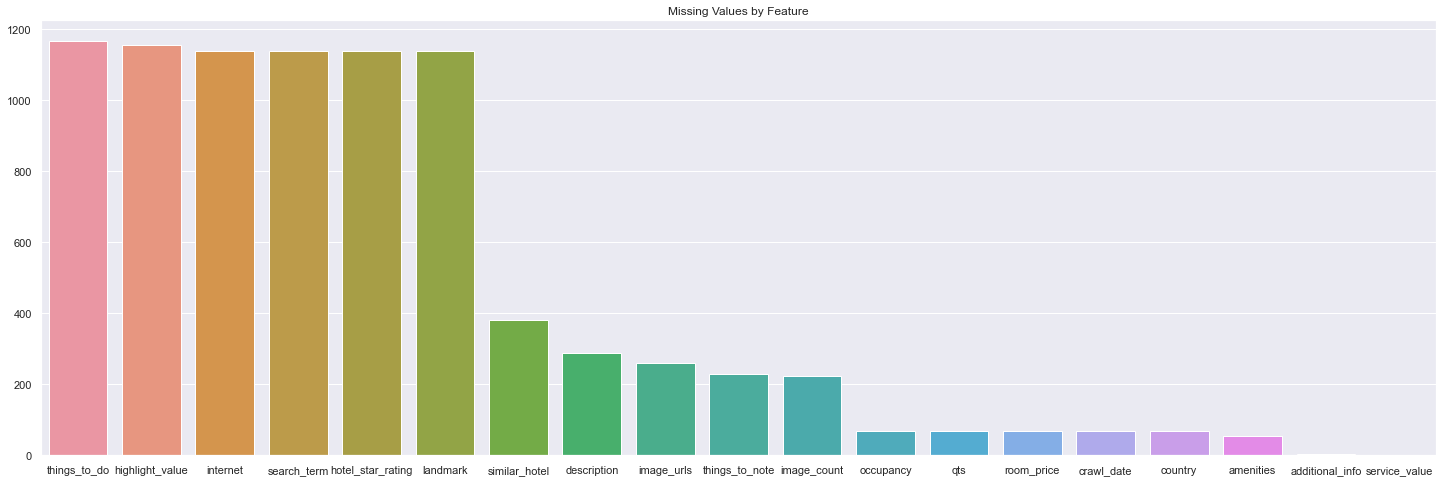

In [235]:
missings = df.isna().sum()[df.isna().sum() > 0].sort_values(ascending = False)

plt.figure(figsize=(25,8))
plt.title("Missing Values by Feature")
sns.barplot(x = list(missings.index), y = list(missings.values))

### 1.4 Misleading Values

In [236]:
df[['additional_info', 'amenities','internet','things_to_do','things_to_note']].iloc[4:,:]

additional_info  \
4     Acceptance Rate:100 percent|Response Time:< 6 ...   
5     Acceptance Rate:100 percent|Response Time:< 6 ...   
6     Acceptance Rate:100 percent|Response Time:< 6 ...   
7     Acceptance Rate:100 percent|Response Time:< 6 ...   
8     Acceptance Rate:100 percent|Response Time:> 24...   
...                                                 ...   
1202  ~ All Taxes.~ Complimentary Bed Tea.~ Complime...   
1203                                        ~ All Taxes   
1204  Kindly Note ~ Hotel doesn't have Restaurants i...   
1205  ~ All taxes.~ Complimentary WiFi. And Bed Tea;...   
1206                                                NaN   

                                              amenities              internet  \
4                                          Newspaper|AC                   NaN   
5                      WiFi|Free Breakfast|Newspaper|AC                   NaN   
6                                                  WiFi                   NaN   
7                                          Newspaper|AC                   NaN   
8                                          Newspaper|AC                   NaN   
...                                                 ...                   ...   
1202  Restaurent | Business Center | Wifi | Swimming...         Free Internet   
1203                       Wifi | Laundry | Car Parking         Free Internet   
1204                              Laundry | Car Parking  Internet not present   
1205  Wifi | Credit Card | Laundry | Free Newspaper ...         Free Internet   
1206          Bar/Pub | Wifi | Laundry | Free Newspaper         Free Internet   

                                  things_to_do  \
4                                          NaN   
5                                          NaN   
6                                          NaN   
7                                          NaN   
8                                          NaN   
...                                        ...   
1202  Restaurant | Swimming Pool | Health Club   
1203                                       NaN   
1204                                       NaN   
1205                                       NaN   
1206                                       Bar   

                                         things_to_note  
4     Complimentary Breakfast.|Complimentary WiFi.|C...  
5     CP - Complementary Breakfast.|MAP - Complement...  
6                  All taxes.|Complimentary Break Fast.  
7     All taxes.|Complimentary Breakfast Will be Pro...  
8     All taxes.|Complimentary Wifi.|Kindly Note:|Ex...  
...                                                 ...  
1202                                                NaN  
1203                                                NaN  
1204                                                NaN  
1205                                                NaN  
1206                                                NaN  

[1203 rows x 5 columns]

As you can see above, the internet feature should be binary, but missing values represent a large quantity (over 90%) of values. This is due to the aforementioned split. The attribute's information is displayed elsewhere, depending on the hotel in question. I have personally found it in all of the above features. I personally recommend that we split these attributes into their own specific binary features. (Kind of a one hot encoding scenario). This is especially the case for the has/has no internet case mentioned previously; we add a new feature called Wifi, check each observation for a positive identifier, and use that logic to create the new var. 

## 2.0 Cleaning this Mess

### 2.1. Fixing the Pricing, Rating, and Date Problems

In [237]:
df[['check_in_date','room_price','hotel_star_rating']]

check_in_date               room_price  hotel_star_rating
0       04-08-2016  3167per night incl. tax                NaN
1       04-08-2016   815per night incl. tax                NaN
2       04-08-2016  1624per night incl. tax                NaN
3       04-08-2016  3509per night incl. tax                NaN
4       04-08-2016  5802per night incl. tax                NaN
...            ...                      ...                ...
1202    06/01/2016                      NaN                0.0
1203    06/01/2016                      NaN                0.0
1204    06/01/2016                      NaN                0.0
1205    06/01/2016                      NaN                0.0
1206    06/01/2016                      NaN                0.0

[1207 rows x 3 columns]

All of these features are strings when they should be, respectively, dates and integers. The ratings feature does not seem to have many real values (i.e. not Nan or 0); although said feature would be helpful in theory, it only having these values would make it worthless.

### 2.1.1  Room Price

In [238]:
# Room price - convert to integer after dropping string segments
df['room_price'] = pd.to_numeric(df['room_price'].str.replace('p.*', '', regex = True))

Aside from transforming the feature from a string into a float value, we need to look at its distribution:

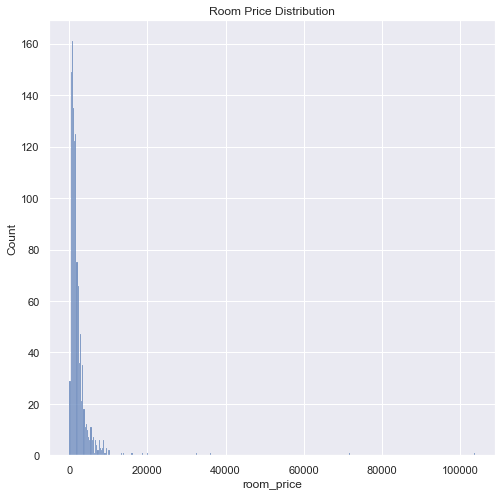

In [239]:
plt.figure(figsize = (8,8))
sns.histplot(data = df, x = "room_price")
plt.title("Room Price Distribution");

Well, that is not a normal distribution. There also seems to be a couple of outliers that are causing problems. Let's take a look.

In [240]:
print('Top Down', '\n', df['room_price'].sort_values(ascending = False).head(20), '\n')
print('Bottom Up', '\n', df['room_price'].sort_values().head(5))
df = df.drop(index = [437,331,537,696, 96])

# reset index and remove prior one
df.reset_index(inplace = True, drop = True)

Top Down 
 437    103889.0
331     71614.0
537     36000.0
696     32620.0
796     19925.0
62      18606.0
48      15889.0
461     14056.0
510     13334.0
446     10389.0
293     10389.0
522     10017.0
304     10000.0
588      9445.0
910      9445.0
809      9412.0
719      9243.0
439      8889.0
320      8889.0
361      8889.0
Name: room_price, dtype: float64 

Bottom Up 
 96       2.0
761     78.0
167    100.0
538    150.0
63     156.0
Name: room_price, dtype: float64


Personally, I think we have five outliers here. The first two are obvious (those above 70000), but the values above 30000 are still well outside of the distribution's mass. There is also an outlier on the lower end, the hotel that charges 2 per night. After removing the outliers, we will fit the room price attribute to a Gaussian distribution by performing a log transformation.

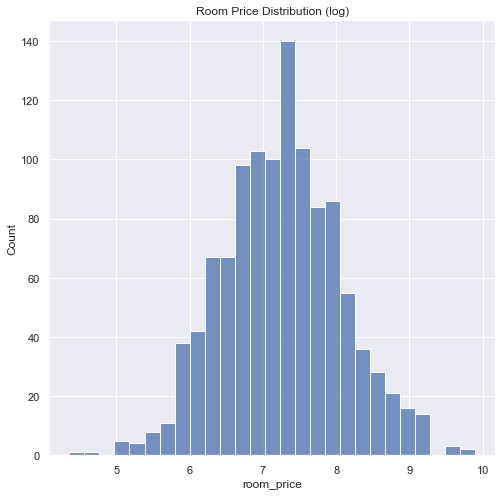

In [241]:
df['room_price'] = df['room_price'].transform(np.log)

plt.figure(figsize = (8,8))
sns.histplot(data = df, x = 'room_price')
plt.title("Room Price Distribution (log)");

Beautiful

### 2.1.2  Median Income By State & Room Price as Pct of Median Income

Next up, I want to create a new feature, room price as percentage of median income by state. 

### 2.1.3 Datetime

In [242]:
## Convert feature to datetime
temp = pd.to_datetime(df['check_in_date'])

## Retrieve year and month from the datetime feature; allow them their own attribute
df['check_year'] = pd.DatetimeIndex(temp).year
df['check_month'] = pd.DatetimeIndex(temp).month

## drop overlapping features
df = df.drop(['check_in_date','check_out_date'], axis = 1)

### 2.1.4  Ratings

In [243]:
# Ratings - find if it can be saved

print(df['hotel_star_rating'].fillna(-1).value_counts())
df = df.drop('hotel_star_rating', axis = 1)

-1.0    1134
 0.0      46
 3.0      16
 4.0       3
 2.0       2
 1.0       1
Name: hotel_star_rating, dtype: int64


It cannot; more than 1100 of the values are missing (-1), and fifty more have zeroes as their rating, which may also be standins for missing at this point. Unless we retrieve more information, this feature is useless

### 2.1.5 City Names and States/Median Income Features

In [244]:
df['city'][df['city'] == 'Alapuzzha'] = 'Alappuzha'
df['city'][df['city'] == 'Chittaurgarh'] = 'Chittorgarh'
df['city'][df['city'] == 'Jhunjhunun'] = 'Jhunjhunu'
df['city'][df['city'] == 'Yamuna Nagar'] = 'Yamunanagar'
df['city'][df['city'] == 'Kodarma'] = 'Koderma'
df['city'][df['city'] == 'Koduma'] = 'Koderma'

df['city'] = df['city'].str.title()

states = pd.read_excel("./data/stayzilla_states.xlsx")
states.columns = ['city', 'state']
states['city'] = states['city'].str.title()
states['state'] = states['state'].str.title()

#states = states.drop(index = [59])
#states.reset_index(drop = True, inplace = True)

In [245]:
#states[states['city'] == 'Kalimpong']
#df[df['city'] == Kalimpong]

First we need to do a little to align the two datasets and standardize the string formatting. Afterwards we convert the dataframe into a dictionary holding each city and state combination. This is then used to create our new feature.

In [246]:
### 
st_dict = {}
for i in range(len(states)):
    st_dict[states.iloc[i,0]] = states.iloc[i,1]

df['state'] = 0
for i in range(len(df)):
    df['state'].iloc[i] = st_dict[df['city'][i]]

In [247]:
df[['city', 'state']]

city             state
0       Kalimpong       West Bengal
1          Kanpur     Uttar Pradesh
2         Jodhpur        Rajasthan 
3      Jalpaiguri       West Bengal
4          Kanpur     Uttar Pradesh
...           ...               ...
1197        Mandi  Himachal Pradesh
1198     Bhilwara         Rajasthan
1199  Gandhinagar           Gujarat
1200   Uttarkashi       Uttarakhand
1201          Goa               Goa

[1202 rows x 2 columns]

### 2.2  Fixing the Country and Occupancy Features

In [248]:
df[['occupancy','country']]

occupancy country
0     3 Adults 2 Kids   India
1     2 Adults 2 Kids   India
2     2 Adults 2 Kids   India
3      1 Adult 2 Kids   India
4     2 Adults 2 Kids   India
...               ...     ...
1197              NaN     NaN
1198              NaN     NaN
1199              NaN     NaN
1200              NaN     NaN
1201              NaN     NaN

[1202 rows x 2 columns]

These two features suffer from slightly different problems. Country has one value; it is known based on the metadata, so we will fill it in. I wanted to keep the feature because it may be what allows us to differentiate this set from the one Anh finds. Occupancy is a string, which should be a numeric value. I'll place each value in their own attribute, which we could then easily combine later if needed.

In [249]:
## Convert all values in country feature to 'India'
df['country'] = 'India'

# split occupancy into occupancy for adults and children
df['occupancy'] = df['occupancy'].str.replace('\D', ' ', regex = True).str.split()
df['occupancy_adult'] = pd.to_numeric(df['occupancy'][0][0])
df['occupancy_child'] = pd.to_numeric(df['occupancy'][0][1])
df = df.drop('occupancy', axis = 1)

df[['occupancy_adult','occupancy_child']]

occupancy_adult  occupancy_child
0                   3                2
1                   3                2
2                   3                2
3                   3                2
4                   3                2
...               ...              ...
1197                3                2
1198                3                2
1199                3                2
1200                3                2
1201                3                2

[1202 rows x 2 columns]

### 2.3 Finding Common Values Across the Four Features Shown Above

In [250]:
### Fill missing values and clean the strings

df['things_to_do'] = df['things_to_do'].fillna(' 0 ')
df['things_to_do'] = df['things_to_do'].str.replace('|', '').str.replace('/',' ').str.lower()
df['amenities'] = df['amenities'].fillna(' 0 ')
df['amenities'] = df['amenities'].str.replace('|', ' ').str.replace('&', '').str.replace('/', ' ').str.lower()

df['service_value'] = df['service_value'].fillna(' 0 ')
df['service_value'] = df['service_value'].str.replace('|', ' ').str.lower()

## Moving things of note info where they should be for records 1139 to the end
cut = df.iloc[1134:,0]
df.iloc[1134:]['things_to_note'] = cut
df.iloc[1134:,0] = float('NAN')
df['things_to_note'] = df['things_to_note'].fillna(' 0 ')
df['things_to_note'] = df['things_to_note'].str.replace('[^a-zA-Z]', ' ', regex = True).str.replace('Kindly Note:*', "", regex = True).str.lower()

### Create a concat feature that consists of concatenated strings from prior four features
df['concat'] = df['amenities'] + df['things_to_do'] + df['things_to_note'] + df['service_value']
df['concat'] = df['concat'].str.split()

I removed any separators and miscellaneous signs from each Series. Additionally, I moved the observations from the second grouping of data (records 1134-1206) under the 'additional_info' to the 'things_to_note' feature. This is due to the similar phrases used by both such as 'All taxes' and 'Complimentary Wifi'. I also removed everything occurring after 'Kindly Note:' in the 'things_to_note' attribute; everything ocurring after that phrase is too granular (as in its specific to each individual hotel). Lastly I filled in NaN values with zeroes as strings.

In [251]:
unique_vals = []
for value in df['amenities'].str.split():
    if value == value:
        for word in value:
            unique_vals.append(word)
unique_vals = list(set(unique_vals))
unique_vals

['payment',
 'center',
 'credit',
 'and',
 'breakfast',
 'only',
 'parking',
 'drop',
 'newspaper',
 'gym',
 'ac',
 'facility',
 'wifi',
 'pool',
 'free',
 'veg',
 '0',
 'pickup',
 'pub',
 'bar',
 'business',
 'card',
 'elevator',
 'restaurent',
 'swimming',
 'car',
 'laundry']

These are the unique values for the 'amenities' feature. There is not that much variety in the number of words used, so, if we can match those keywords with those used in the other features, we have a way forward.

In [252]:
unique_vals = []
for value in df['things_to_do'].str.split():
    if value == value:
        for word in value:
            unique_vals.append(word)
unique_vals = list(set(unique_vals))
unique_vals

['restaurant', 'health', 'bar', 'club', 'swimming', '0', 'pool']

Perfect! This feature does not have too many keywords, and they match those of 'amenities'.

In [253]:
unique_vals = []
for value in df['service_value'].str.split():
    if value == value:
        for word in value:
            unique_vals.append(word)
unique_vals = list(set(unique_vals))
unique_vals

['not',
 'pickup',
 'check',
 'parking',
 'drop',
 'and',
 'free',
 'newspaper',
 '24',
 'out',
 'in',
 '0',
 'laundry',
 'hour',
 'verified']

No problems here

In [254]:
unique_vals = []
for value in df['things_to_note'].str.split():
    if value == value:
        for word in value:
            unique_vals.append(word)
unique_vals = list(set(unique_vals))
unique_vals.sort()
len(unique_vals)

680

So this last list is a bit ridiculous because each of the sections are written by each specific hotelier rather than using keywords. Even after condensing much of the work with regular expressions (down from about 1200), misspellings and the like make exact matches an exercise in frustration. The new plan is to use fuzzy string matching to do the work for me. 

### 2.3 Convert Keywords to Features

In [255]:
pot_features = ['restaurant', 'pool', 'health', 'bar', 'wifi','laundry','elevator','credit','business','newspaper','gym','veg','parking','pickup','taxes','breakfast']

# for each keyword(unique) in the potential features list, create a list of zeroes, search the new 'concat' attribute for the keyword, and, if they find a match on observation i, convert col[i] to true
# then transform the list into a series, which is then added to the dataset before the next loop iteration begins
for unique in pot_features:
    col = [0]*len(df)
    i = 0
    for string in df['concat']:
        for word in string:
            if fuzz.ratio(unique, word) >= 80:
                col[i] = 1
        i += 1
    df[unique] = pd.Series(col, name=unique)

## Drop previous features
df = df.drop(['amenities','things_to_do','things_to_note','concat','service_value'], axis = 1)

In [256]:
df[pot_features].sum().sort_values()

health         12
business       22
credit         41
gym            50
pool           52
laundry        62
veg            76
bar            87
elevator      117
pickup        160
restaurant    201
parking       494
wifi          551
breakfast     551
newspaper     613
taxes         711
dtype: int64

My plan here is to create a new feature for each keyword to replace the jumbled mess that the prior attributes left us with. There is occasional overlap, like with internet and wifi, but we can merge them afterwards. 

### 2.4 Merging Overlapping Features and Renaming Vague Ones

In [257]:
df = df.rename(columns= {'veg': 'vergetables_only', 'taxes':'all_taxes', 'pickup':'pickup_and_drop', 'business':'business_center'})

In [258]:
## internet
df['internet'] = np.where(((df['internet'] != df['internet']) | (df['internet'] == 'Internet not present')), 0, 1)
df['wifi'] = np.where(((df['internet'] == 1) | (df['wifi'] == 1)), 1, 0)
df = df.drop('internet', axis = 1)

After merging 'wifi' and 'internet', we are left with these features and these values. What we need to decide on now is what features are prevalent enough to be kept, and which ones are unrealistic. This, of course should be done with as little bias as possible, but there is a clear concern that some hotels can claim some aspect of its services are a selling point while others who still have taht service (elevator for example) don't mention it. We could make the argument/assumption that these features designate what is marketed towards customers rather than what is actually there. 

A couple of the suggested changes: combine restaurant and breakfast because, presumedly, the breakfast is served at the hotel's rough equivalent to a restaurant. Maybe also merge gym and health center. I'd also recommend dropping all features with less than 50 positive values. 

In [259]:
## eating
df['restaurant'] = np.where(((df['restaurant'] == 1) | (df['breakfast'] == 1)), 1, 0)
df['gym'] = np.where(((df['gym'] == 1) | (df['health'] == 1)), 1, 0)
df = df.drop(['breakfast','health','business_center','credit'], axis = 1)

There are also a lot of features in this dataset that do not seem to be relevant towards our stated goals. I believe we should drop them (shown below), but a second/group opinion would be best.

In [260]:
df = df.drop(['crawl_date','description','highlight_value','image_count','image_urls','property_id','qts','pageurl', 'query_time_stamp','similar_hotel','property_address','additional_info','search_term','landmark'], axis = 1)

## 3.0 Brazil Dataset

In [261]:
br = pd.read_csv("./data/brazil_listings.csv")

### 3.1 Overview

In [262]:
print('Dataset shape: ',br.shape, '\n')
br.head()

Dataset shape:  (33715, 106) 



id                         listing_url       scrape_id last_scraped  \
0  17878  https://www.airbnb.com/rooms/17878  20191122092441   2019-11-22   
1  25026  https://www.airbnb.com/rooms/25026  20191122092441   2019-11-22   
2  31560  https://www.airbnb.com/rooms/31560  20191122092441   2019-11-22   
3  35636  https://www.airbnb.com/rooms/35636  20191122092441   2019-11-22   
4  35764  https://www.airbnb.com/rooms/35764  20191122092441   2019-11-22   

                                             name  \
0               Very Nice 2Br - Copacabana - WiFi   
1       Beautiful Modern Decorated Studio in Copa   
2                NICE & COZY 1BDR - IPANEMA BEACH   
3                Cosy flat close to Ipanema beach   
4  COPACABANA SEA BREEZE  -  RIO - 20 X Superhost   

                                             summary  \
0  Pls note that special rates apply for Carnival...   
1  Our apartment is a little gem, everyone loves ...   
2  This nice and clean 1 bedroom apartment is loc...   
3  This cosy apartment  is just a few steps away ...   
4  Our newly renovated studio is located in the b...   

                                               space  \
0  - large balcony which looks out on pedestrian ...   
1  This newly renovated studio (last renovations ...   
2  This nice and clean 1 bedroom apartment is loc...   
3  The location is extremely convenient, safe and...   
4  FEEL LIKE YOUR HOME LIVING AS "CARIOCA" LOCAL ...   

                                         description experiences_offered  \
0  Pls note that special rates apply for Carnival...                none   
1  Our apartment is a little gem, everyone loves ...                none   
2  This nice and clean 1 bedroom apartment is loc...                none   
3  This cosy apartment  is just a few steps away ...                none   
4  Our newly renovated studio is located in the b...                none   

                               neighborhood_overview  ... instant_bookable  \
0  This is the best spot in Rio. Everything happe...  ...                t   
1  Copacabana is a lively neighborhood and the ap...  ...                f   
2  Die Nachbarschaft von Ipanema ist super lebend...  ...                t   
3  The  apartment street is very quiet and safe ....  ...                f   
4  Our guests will experience living with a local...  ...                f   

  is_business_travel_ready          cancellation_policy  \
0                        f  strict_14_with_grace_period   
1                        f  strict_14_with_grace_period   
2                        f  strict_14_with_grace_period   
3                        f  strict_14_with_grace_period   
4                        f  strict_14_with_grace_period   

  require_guest_profile_picture require_guest_phone_verification  \
0                             f                                f   
1                             t                                t   
2                             f                                f   
3                             t                                t   
4                             f                                t   

   calculated_host_listings_count  \
0                               1   
1                               3   
2                               1   
3                               1   
4                               1   

   calculated_host_listings_count_entire_homes  \
0                                            1   
1                                            3   
2                                            1   
3                                            1   
4                                            1   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   calculated_host_listings_count_s

This dataset seems to be much fatter than our other one (~34000 observations vs. ~1200 observations). There are also far more features here, but many seem ancilliary. 

### 3.2 Missing Values

In [263]:
br.isna().sum().sum()

686685

We've got about 700,000 missing values here. Like the prior dataset, these also do not seem to be random. The missing values are primarily concentrated on, thankfully, useless features, but the missing values in the pricing and locale attributes are concerning. 

In [264]:
br.isna().sum().sort_values(ascending = False).head(35)

medium_url                      33715
host_acceptance_rate            33715
jurisdiction_names              33715
xl_picture_url                  33715
thumbnail_url                   33715
neighbourhood_group_cleansed    33715
license                         33713
square_feet                     33220
weekly_price                    31169
monthly_price                   30890
notes                           22468
access                          17683
host_about                      17543
interaction                     16913
house_rules                     16291
review_scores_checkin           15441
review_scores_accuracy          15440
review_scores_location          15438
review_scores_value             15437
review_scores_cleanliness       15435
review_scores_communication     15435
review_scores_rating            15422
transit                         14976
neighborhood_overview           14877
security_deposit                14780
reviews_per_month               14566
first_review

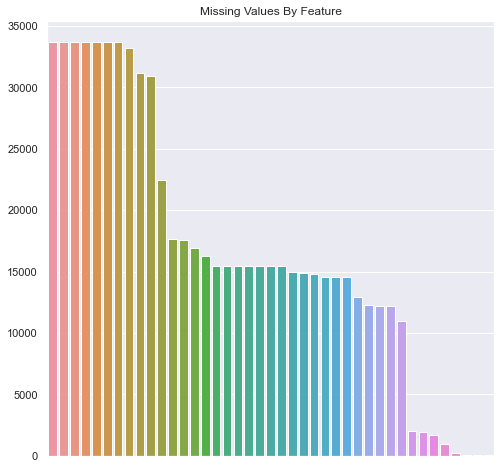

In [265]:
missings = br.isna().sum()[br.isna().sum() > 50].sort_values(ascending = False)

plt.figure(figsize=(8,8))
figure = sns.barplot(x = missings.index, y = missings.values)
x_axis = figure.axes.get_xaxis()
x_axis.set_visible(False)
plt.title("Missing Values By Feature");

We have a dataset where missing value counts are shared across features, meaning that they are not random. They are also plentiful; I hid the feature names, normally on the x axis, because it would be illegible due to the sheer number and overlap of names.

## 4.0 Feature Engineering

In [266]:
br = br[['last_scraped','city','state','country','latitude','longitude','property_type','room_type','accommodates','amenities','price','number_of_reviews','review_scores_rating']]

### 4.1 Year, Country, and Pricing Datatypes

In [267]:
br[['last_scraped','country','price']].head()

last_scraped country    price
0   2019-11-22  Brazil  $332.00
1   2019-11-22  Brazil  $160.00
2   2019-11-22  Brazil  $273.00
3   2019-11-22  Brazil  $378.00
4   2019-11-22  Brazil  $130.00

We will only want the year of the last_scraped category to add a comparable temporal aspect to the dataset. 

All of the values in the 'country' attribute should be Brazil, but there are a few 'Dominica's. 

Lastly, price needs to be a float, not a string. It will also need to be standardized (geospatially and normally); we found the median income for people in the state and chose divide the price by that to find the percentage of an individual's median income that is spent on this experience daily.

In [268]:
## Create new features
br['year'] = pd.DatetimeIndex(br['last_scraped']).year
br['country'] = 'Brazil'
br['price'] = pd.to_numeric(br['price'].str.replace('$','').str.replace(',',''))

## Delete last_scraped feature
br.drop('last_scraped', axis = 1, inplace = True)

In [269]:
br[['year','country','price']].head()

year country  price
0  2019  Brazil  332.0
1  2019  Brazil  160.0
2  2019  Brazil  273.0
3  2019  Brazil  378.0
4  2019  Brazil  130.0

### 4.2 City and State Cleaning

In [270]:
list(br['city'].unique()[1:10])

['Rio',
 'IPANEMA',
 'Copacabana',
 'Rio de janeiro ',
 'Barra da Tijuca',
 'Glória',
 'Itanhangá',
 'Rio De Janeiro',
 'Ipanema']

There is a lot of variance in how one city (mainly Rio) is written in this feature; that needs to be addressed. The same goes for the 'state' feature. 

In [271]:
## Temporarily fix missing values
br['city'].fillna('None', inplace = True)
br['state'].fillna('None', inplace = True)

## Basic string normalization: remove special characters, move to lower case, remove white space
br['city'] = br['city'].str.replace('/','').str.replace('-','').str.replace(',','').str.lower().str.strip()
br['state'] = br['state'].str.replace('/','').str.replace('-','').str.replace(',','').str.replace('.','').str.lower().str.strip()

## Replace other languages with English translation
br['city'] = br['city'].str.replace('里约热内卢','rio de janeiro').str.replace('リオ・デ・ジャネイロ','rio de janeiro').str.replace('риодежанейро','rio de janeiro')
br['state'] = br['state'].str.replace('里约热内卢','rio de janeiro').str.replace('リオ・デ・ジャネイロ','rio de janeiro').str.replace('риодежанейро','rio de janeiro')
## Replace special accentuated characters with English equivalents
br['city'] = br['city'].str.normalize('NFKC').str.encode('ascii', errors = 'ignore').str.decode('utf-8')
br['state'] = br['state'].str.normalize('NFKC').str.encode('ascii', errors = 'ignore').str.decode('utf-8')

## Grab the Rios
br['city'][br['city'].str.contains('rio|rj|freguesia|barra|centro|gloria|flamingo|copacabana|janeiro', regex = True)] = 'rio de janeiro'
br['state'][br['state'].str.contains('rio|rj|freguesia|barra|centro|gloria|flamengo|copacabana|janeiro', regex = True)] = 'rio de janeiro'

The features have been heavily standardized, but one topic for discussion later is how neighborhoods of Rio de Janeiro should be treated (as their own entities or as part of the city).

### 4.3 Amenities Cleaning

In [272]:
br['amenities'].head()

0    {TV,"Cable TV",Internet,Wifi,"Air conditioning...
1    {TV,"Cable TV",Internet,Wifi,"Air conditioning...
2    {TV,"Cable TV",Internet,Wifi,"Air conditioning...
3    {TV,"Cable TV",Internet,Wifi,"Air conditioning...
4    {TV,"Cable TV",Wifi,"Air conditioning",Kitchen...
Name: amenities, dtype: object

We have a feature here that consists of a grouping of amenities offered at the hotel; like the Indian dataset, I plan on separating the values into their own features.

In [273]:
br['amenities'] = br['amenities'].str.replace('{', '').str.replace(',',' ').str.replace('"','').str.replace('}','').str.lower().str.split()

In [274]:
unique_vals = {}
for value in br['amenities']:
    if value == value:
        for word in value:
            if word not in unique_vals:
                unique_vals[word] = 1
            else:
                unique_vals[word] += 1

pd.Series(unique_vals).sort_values(ascending = False).head(10)

tv              41738
friendly        35034
allowed         30943
kitchen         30849
wifi            30765
essentials      28344
air             26911
conditioning    26911
on              26395
elevator        24521
dtype: int64

Above are our top-mentioned features. I grabbed most of these, as well as a few more, and now I will make them their own binary attributes.

In [275]:
keywords = ['tv','cable','internet','wifi','air','kitchen','parking','elevator','washer','dryer','pool']

# for each keyword(unique) in the potential features list, create a list of zeroes, search the new 'concat' attribute for the keyword, and, if they find a match on observation i, convert col[i] to true
# then transform the list into a series, which is then added to the dataset before the next loop iteration begins
for unique in keywords:
    col = [0]*len(br)
    i = 0
    for string in br['amenities']:
        for word in string:
            if fuzz.ratio(unique, word) >= 80:
                col[i] = 1
        i += 1
    br[unique] = pd.Series(col, name=unique)

In [276]:
## Merging wifi and internet
br['wifi'] = np.where(((br['internet'] == 1) | (br['wifi'] == 1)), 1, 0)
br = br.drop('internet', axis = 1)

## 5.0. So What Do We Have?

### 5.1: Geographic Location

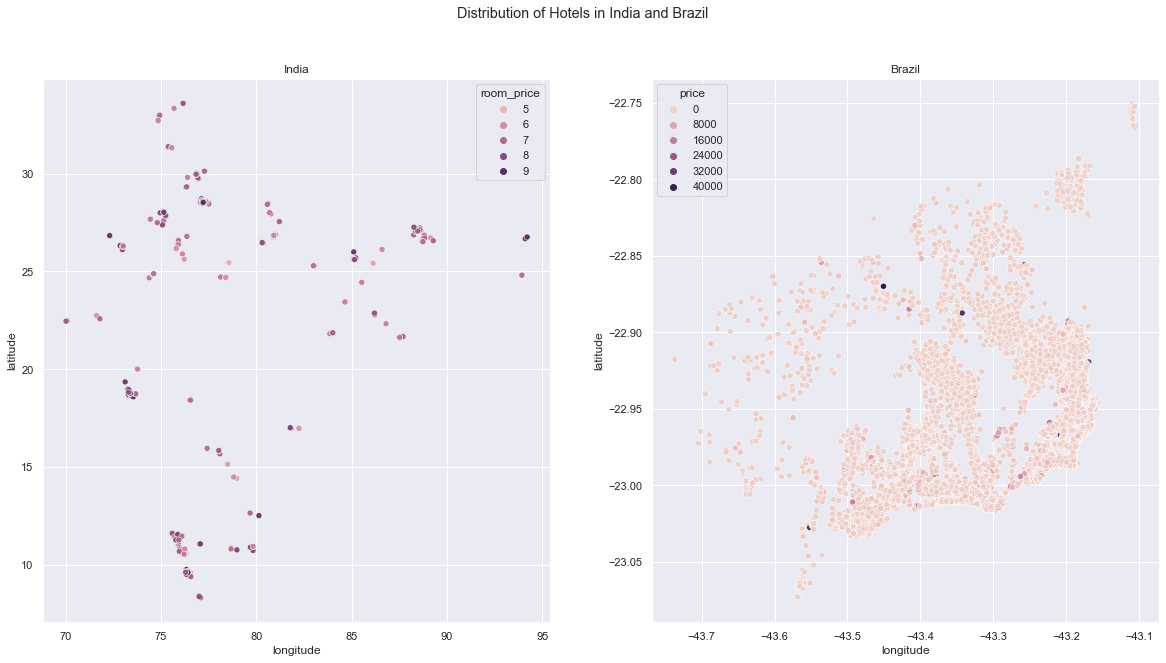

In [277]:
sns.set_theme()

fig, axes = plt.subplots(1,2, figsize = (20,10))
fig.suptitle("Distribution of Hotels in India and Brazil")

axes[0].set_title("India")
axes[1].set_title("Brazil")

sns.scatterplot(data = df, x = 'longitude', y = 'latitude', ax = axes[0], hue = 'room_price')
sns.scatterplot(data = br, x = 'longitude', y = 'latitude', ax = axes[1], hue = 'price');

We can see the hotels spread across India and multiple clusters, especially near Mumbai and New Delhi. 

### 5.2: Correlation Coefficient

## 6.0 Pipeline

In [ ]:
## Numerical Pipeline
#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import StandardScaler, OneHotEncoder
#from sklearn.pipeline import Pipeline

#num_pipeline = Pipeline([
 #   ('imputer', SimpleImputer(strategy = 'median')),
 #   ('standard', StandardScaler())
#])

## Full Pipeline
#from sklearn.compose import ColumnTransformer

#tempdf = df.drop(['city','country','property_name','room_price','room_price_as_pct_of_income','check_year','check_month'])

#categorical_attributes = ['property_type']
#numerical_attributes = ['occupancy_adult','occupancy_child','latitude','longitude']

#full_pipeline = ColumnTransformer([
#    ('cats', OneHotEncoder(), categorical_attributes),
#    ('nums', num_pipeline, numerical_attributes)
#], remainder='passthrough')

#tempdf = full_pipeline.fit_transform(tempdf)

# TODO

INDIA
1. Add in feature (2.1.2): median state income, divide room price by median income (or we simply use the national median income)
2. Find the correlation coefficient and p-values for numerical features (3.2)

BRAZIL
1. Look through Brazil dataset for more amenities/features to add, discuss neighborhood vs Rio de Janeiro conflict in cities/states feature
2. Convert price denomination from USD to local currency and make it pct of income
3. Fill in missing values effectively (use lat/long for IDing cities/states)
Last. AFTER MAYBE MERGING DATASETS: fill in NA values in room price by finding the median per state (maybe city)